 # Spotify Insights on Audio Features and Popularity Trends

## Introduction:

In the world of music streaming, understanding listener preferences and characteristics of popular songs is key to creating engaging playlists and improving user experience.

This data analysis focuses on a dataset from Spotify, which includes details on track popularity, genre, subgenre, and audio features such as danceability, energy, and valence.

The primary goal of this analysis is to uncover patterns and correlations that influence track popularity, provide insights into trends over time, and determine defining features of high-performing playlists. By categorizing songs based on genres, subgenres, and popularity, and examining correlations between audio attributes and listener preferences, this analysis provides valuable findings for playlist curation, music production, and marketing strategies. These findings will enable streaming platforms, curators, and artists to better cater to audience preferences and enhance the overall music streaming experience.


### Data Source
[The link to the original dataset, and the codebook are here for convenience and transparency.](https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-01-21/readme.md)

## Problem Statements

The report will focus on 4 key issues.

1. **How does song popularity vary across different genres and subgenres?**

* **Interest**: Help streaming services, playlist curators, and music producers understand genre and subgenre preferences, allowing them to promote genres with high engagement or cater to niche audiences with low popularity.

* **Approach**: Analyze the average popularity of songs across different genres and subgenres by grouping data by playlist_genre and playlist_subgenre and calculating the mean track_popularity. Visualizations like bar charts can highlight genres with high and low popularity.

2. **What audio features are associated with high track popularity?**

* **Interest**: Identifying features like danceability, energy, or valence that correlate with popularity can help artists and producers create music more aligned with listener preferences, potentially boosting engagement.

* **Approach**: Perform a correlation analysis to understand relationships between track_popularity and audio features (danceability, energy, valence, speechiness, etc.). Visuals such as scatter plots and correlation matrices will illustrate and confirm findings.

3. **Are there any patterns in track popularity based on the release date of the album?**

* **Interest**: This could uncover if newer or older songs generally perform better, which could inform playlist curators about which tracks to feature more prominently.

* **Approach**: Convert 'track_album_release_date' into a year, then analyze the average popularity across different years. Visualized with a line chart to show trends over time.

4. **What are the defining characteristics of popular vs. less popular playlists?**

* **Interest**: Understanding the features that make a playlist popular could guide playlist curation strategies for better listener engagement.

* **Approach**: Segment playlists into popular and less popular categories based on average 'track_popularity'. Calculate and compare the means of audio features like danceability, energy, valence, and others for each category. Use comparative bar charts or box plots to illustrate differences.

## Methodology

1.	**Data Preprocessing**: Clean the data, handle missing values, and convert required fields into a suitable date format (year) for time-based analyses.

2.	**Statistical Analysis**: Use correlation and grouping techniques to analyze relationships.

3.	**Visualization**: Generate charts to interpret and communicate findings clearly for each problem.

## Analytical techniques

1.	**Descriptive Statistics**:
Summarize key metrics such as average, median, and standard deviation for song features and popularity across different categories

2.	**Correlation Analysis:**
Assess the strength and direction of relationships between track_popularity and audio features

3.	**Grouping and Aggregation:**
Segment data to compare mean popularity or feature values across genres, subgenres, or other categories.

4.	**Time-Series Analysis:**
Observe trends over time, specifically in song popularity based on album release date.

5.	**Data Visualization:**
Communicate findings clearly through visual representations.


## Overall Benefits for End Users

This Spotify data analysis provides valuable insights for end users by identifying popular genres and audio features, allowing artists, producers, and playlist curators to align their offerings with listener preferences. It highlights how song age affects popularity, helping curators strategically balance classic and trending tracks. Additionally, the findings support the creation of engaging playlists by identifying characteristics that improve user satisfaction, ultimately enhancing the streaming experience with personalized recommendations and well-curated content that resonates with audiences.

## Importing libraries
**Summary:**

* *Pandas:* Essential for data manipulation and cleaning, particularly useful for handling tabular data like this dataset.

* *Numpy:* Used for numerical computations and handling arrays, essential for statistical operations.

* *Matplotlib.pyplot:* Fundamental library for creating plots and visualizations to analyze trends, distributions, and relationships.

* *Seaborn:* A visualization library that works well with pandas dataframes and matplotlib; it provides a higher-level interface for complex visualizations.

* *Scipy.stats.pearsonr:* Part of the SciPy library, this function allows calculation of Pearson correlation coefficients, essential for analyzing relationships between popularity and audio features.

In [41]:
# For data manipulation and analysis
import pandas as pd
# For numerical operations, especially in data analysis
import numpy as np
# For creating visualizations
import matplotlib.pyplot as plt
# For enhanced data visualization, especially correlation matrices and heatmaps
import seaborn as sns
# For statistical analysis, specifically to calculate correlation coefficients
from scipy.stats import pearsonr

## Data Cleaning and Preprocessing

**Step 1: Data Importing**
We began by importing the data using pandas. The .read_csv method allowed us to load the data from an csv file, which provides the DataFrame for further analysis.

In [42]:
# Load the spotify dataset
file_path = '/Users/michaelcontreras/Documents/College/Python/Project/Data/spotify_songs.csv'
spotify_data = pd.read_csv(file_path)

**Step 2: Column Names and Datatypes Check**

The dataset’s column names and data types were examined to ensure compatibility with analysis functions and visualization tools. Column names were kept as provided to maintain dataset consistency with the description, and any necessary transformations were handled later in the process.

In [43]:
# Display the first few rows and columns to understand the data structure
spotify_data.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,6/14/19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),12/13/19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),7/5/19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,7/19/19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),3/5/19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


In [44]:
spotify_data.columns

Index(['track_id', 'track_name', 'track_artist', 'track_popularity',
       'track_album_id', 'track_album_name', 'track_album_release_date',
       'playlist_name', 'playlist_id', 'playlist_genre', 'playlist_subgenre',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms'],
      dtype='object')

**Step 3: Duplicates & Missing Values**
After loading the data, columns were checked for any missing values. Missing values can significantly impact analyses, especially in key variables like track_popularity or audio features.

In [45]:
# Removing duplicates if any
spotify_data.drop_duplicates(inplace=True)

# Dropping rows with missing critical values if any
spotify_data.dropna(subset=['track_album_release_date'], inplace=True)

**Step 4: Date Conversion**
The track_album_release_date column, initially in string format, was converted to a datetime type to facilitate time-based analyses. The year was extracted and stored in a new column (album_release_year) for further analyses of trends in popularity over time. This transformation allows for more meaningful year-wise grouping.

In [46]:
# Converting 'track_album_release_date' to datetime
# Used pd.to_datetime with errors='coerce' to handle invalid dates as NaT.
spotify_data['track_album_release_date'] = pd.to_datetime(spotify_data['track_album_release_date'], errors='coerce')


#Extract Year from Album Release Date: To analyze trends over time, we extracted the year from track_album_release_date, storing it in a new column, album_release_year.
# Extracting the year for trend analysis
spotify_data['album_release_year'] = spotify_data['track_album_release_date'].dt.year

**Step 5: Categorical Variables**
The dataset was then segmented into popular and less popular categories based on the median value of track_popularity, allowing us to explore characteristics and audio feature distributions between these two categories effectively.

In [47]:
# Define popularity threshold using the median
popularity_threshold = spotify_data['track_popularity'].median()

spotify_data['popularity_category'] = spotify_data['track_popularity'].apply(lambda x: 'Popular' if x >= popularity_threshold else 'Less Popular')

**Step 6: Summary of Key Variables**
Generating descriptive statistics for numerical features and counts for categorical features

In [48]:
# Numerical features summary
numerical_summary = spotify_data.describe().T[['mean', 'std', 'min', '50%', 'max']]

# Getting unique counts of categories
categorical_summary = spotify_data[['track_artist', 'playlist_name', 'playlist_genre', 'playlist_subgenre', 'popularity_category']].nunique()

categorical_summary = categorical_summary.rename("Unique Values")


In [49]:
# Displaying the summaries in the console
print("Numerical Summary of Key Variables:")
print(numerical_summary)

Numerical Summary of Key Variables:
                             mean           std          min            50%  \
track_popularity        42.477081     24.984074     0.000000      45.000000   
danceability             0.654850      0.145085     0.000000       0.672000   
energy                   0.698619      0.180910     0.000175       0.721000   
key                      5.374471      3.611657     0.000000       6.000000   
loudness                -6.719499      2.988436   -46.448000      -6.166000   
mode                     0.565711      0.495671     0.000000       1.000000   
speechiness              0.107068      0.101314     0.000000       0.062500   
acousticness             0.175334      0.219633     0.000000       0.080400   
instrumentalness         0.084747      0.224230     0.000000       0.000016   
liveness                 0.190176      0.154317     0.000000       0.127000   
valence                  0.510561      0.233146     0.000000       0.512000   
tempo           

In [50]:
print("\nCategorical Summary of Key Variables:")
print(categorical_summary)


Categorical Summary of Key Variables:
track_artist           10692
playlist_name            449
playlist_genre             6
playlist_subgenre         24
popularity_category        2
Name: Unique Values, dtype: int64


## Exploratory Data Analysis

#### **Song popularity across different genres and subgenres**
**Approach:** Analyze the average popularity of songs across different genres and subgenres by grouping data by playlist_genre and playlist_subgenre and calculating the mean track_popularity. Visualizations like bar charts can highlight genres with high and low popularity.

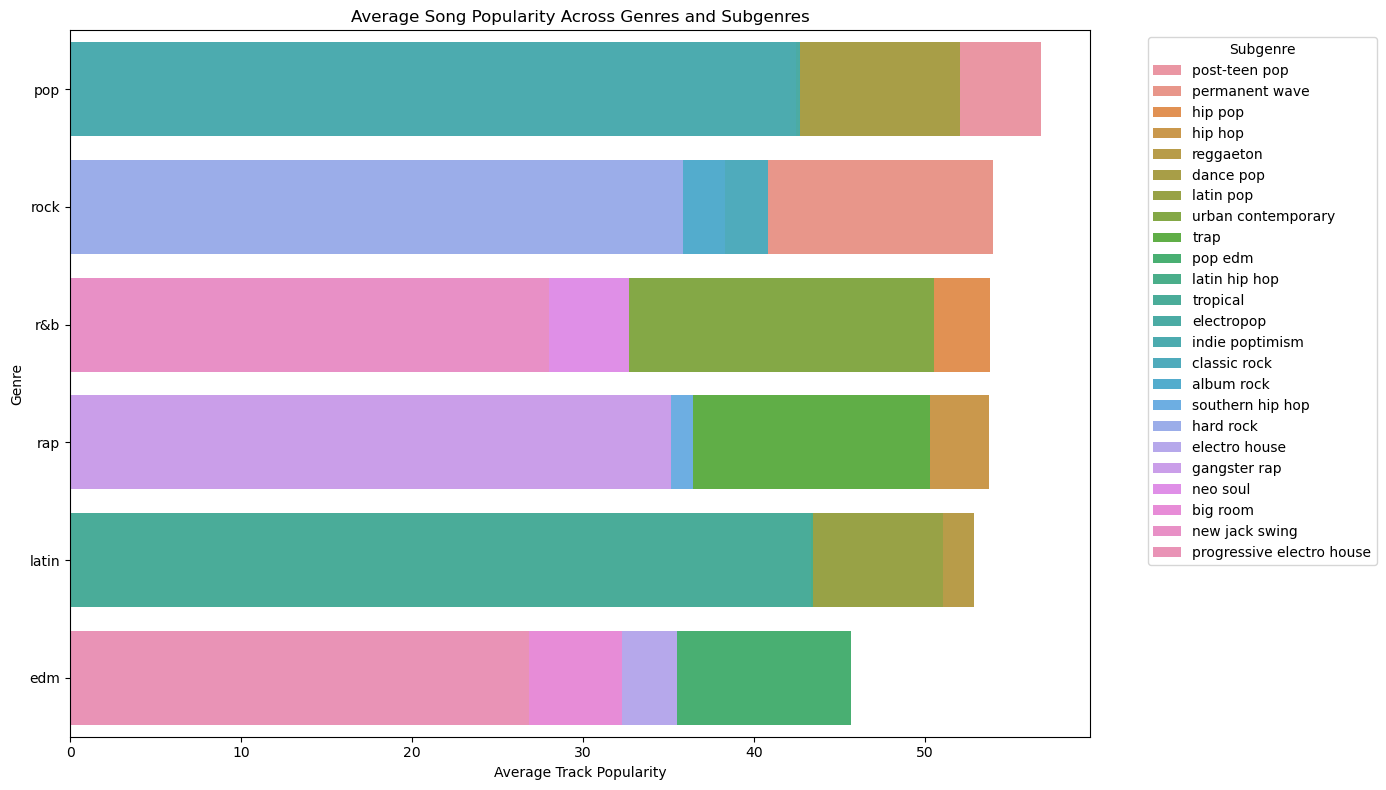

In [51]:
# Grouping data by genre and subgenre to calculate the average track popularity
genre_popularity = spotify_data.groupby(['playlist_genre', 'playlist_subgenre'])['track_popularity'].mean().reset_index()

# Sorting values for better visualization (highest popularity to lowest within each genre)
genre_popularity_sorted = genre_popularity.sort_values(by='track_popularity', ascending=False)

# Plotting the average popularity of songs across genres and subgenres
plt.figure(figsize=(14, 8))
sns.barplot(data=genre_popularity_sorted, x='track_popularity', y='playlist_genre', hue='playlist_subgenre', dodge=False)
plt.title("Average Song Popularity Across Genres and Subgenres")
plt.xlabel("Average Track Popularity")
plt.ylabel("Genre")
plt.legend(title="Subgenre", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

#### **Interpretation:**


### **Audio Features associated with high track popularity**
**Approach:** Perform a correlation analysis to understand relationships between track_popularity and audio features (danceability, energy, valence, speechiness, etc.). We can use scatter plots and correlation matrices to illustrate and confirm findings.

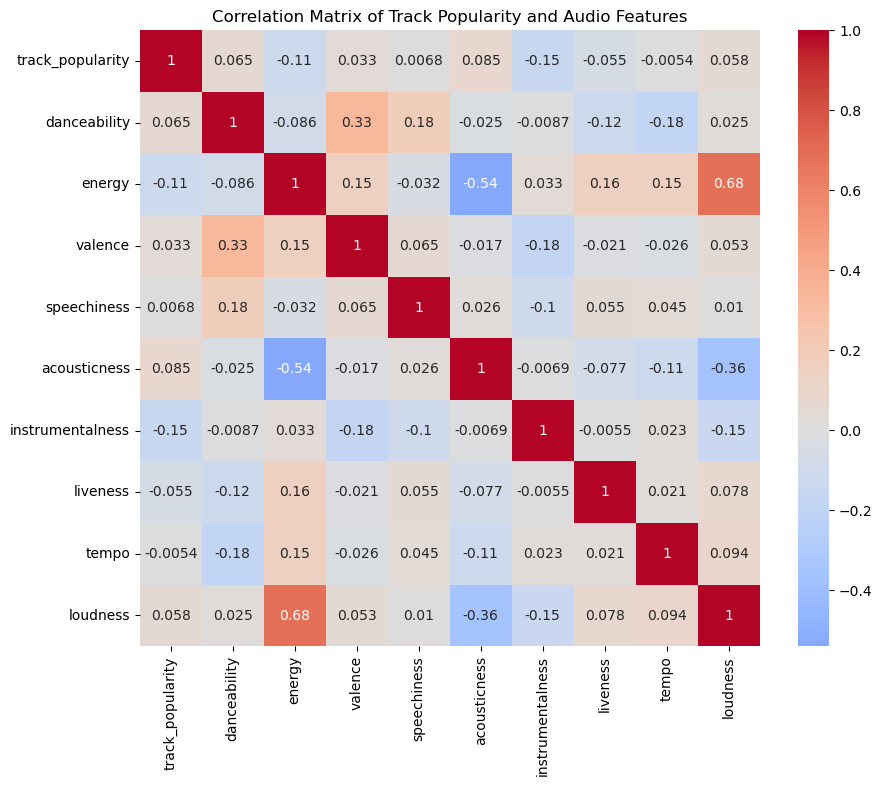

In [52]:
# Selecting relevant columns for correlation analysis
audio_features = ['danceability', 'energy', 'valence', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'tempo', 'loudness']
data_for_correlation = spotify_data[['track_popularity'] + audio_features]

# Calculating correlation matrix
correlation_matrix = data_for_correlation.corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Matrix of Track Popularity and Audio Features")
plt.show()


#### **Interpretation:**


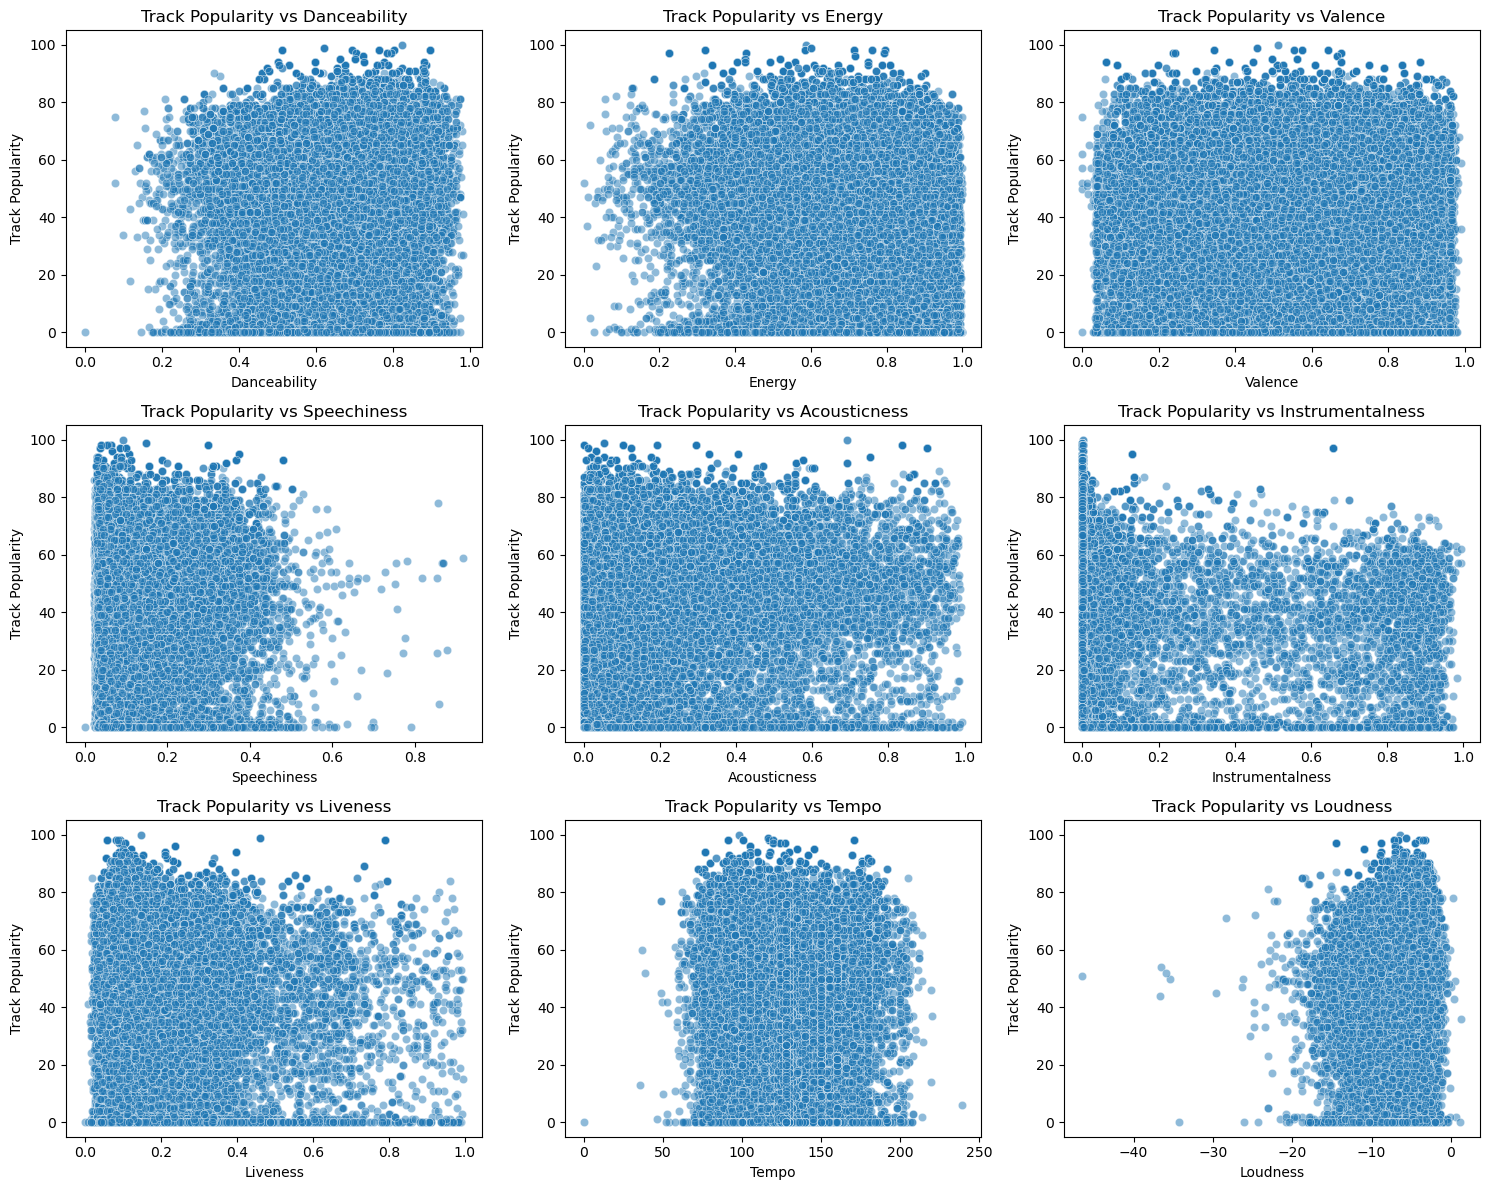

In [53]:
# Scatter plots to visualize correlations between track_popularity and individual audio features
plt.figure(figsize=(15, 12))
for i, feature in enumerate(audio_features, 1):
    plt.subplot(3, 3, i)
    sns.scatterplot(data=spotify_data, x=feature, y='track_popularity', alpha=0.5)
    plt.title(f"Track Popularity vs {feature.capitalize()}")
    plt.xlabel(feature.capitalize())
    plt.ylabel("Track Popularity")

plt.tight_layout()
plt.show()

#### **Interpretation:**


### **Patterns in track popularity based on the release date of the album**
**Approach:** Convert track_album_release_date into a year, then analyze the average popularity across different years. This could be visualized with a line chart to show trends over time.

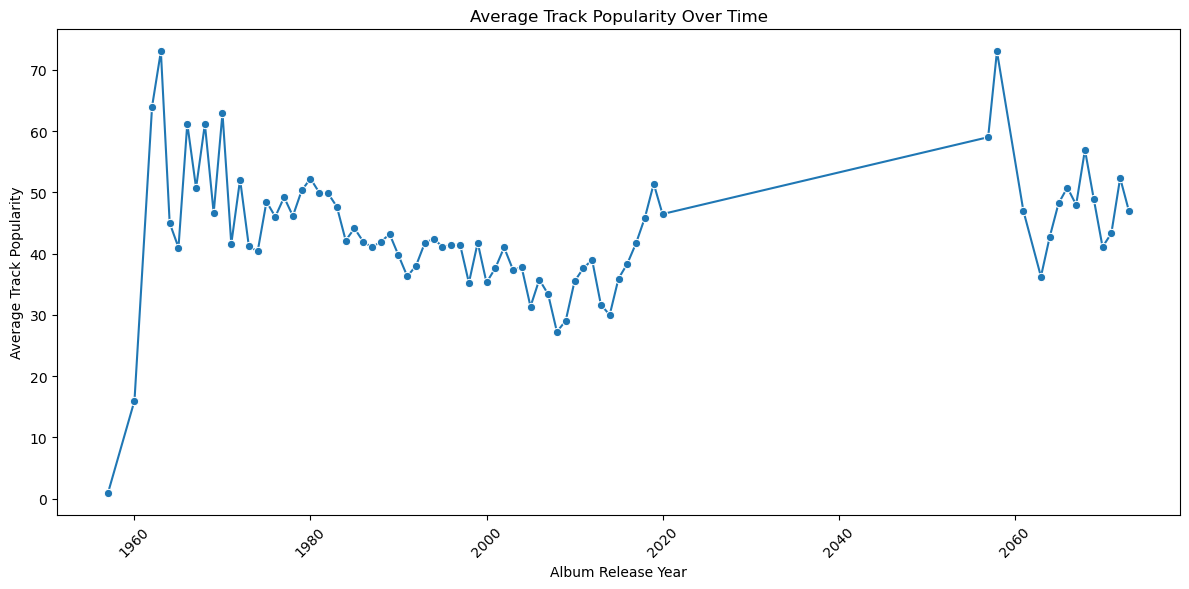

In [54]:
# Converting 'track_album_release_date' to datetime and extracting the year
spotify_data['album_release_year'] = pd.to_datetime(spotify_data['track_album_release_date'], errors='coerce').dt.year

# Calculating average popularity by album release year
yearly_popularity = spotify_data.groupby('album_release_year')['track_popularity'].mean().reset_index()

# Plotting the trend of average track popularity over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_popularity, x='album_release_year', y='track_popularity', marker='o')
plt.title("Average Track Popularity Over Time")
plt.xlabel("Album Release Year")
plt.ylabel("Average Track Popularity")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### **Interpretation:**


### **Characteristics of popular vs. less popular playlists**
**Approach:** Segment playlists into popular and less popular categories based on average track_popularity. Calculate and compare the means of audio features like danceability, energy, valence, and others for each category. Use comparative bar charts or box plots to illustrate differences.

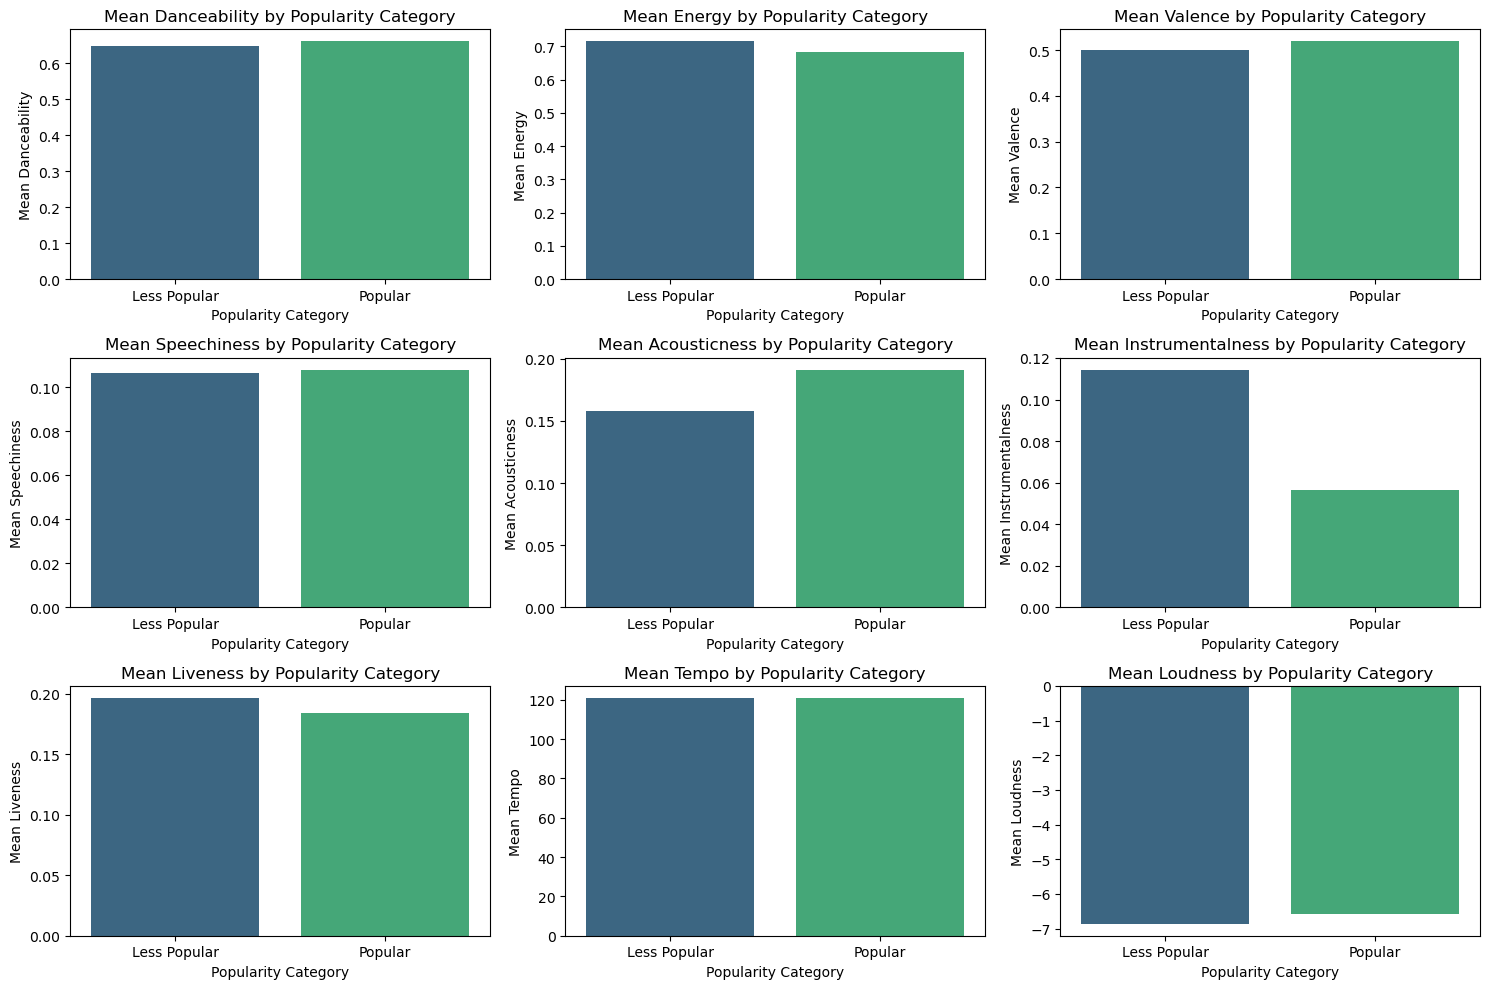

In [55]:
# Defining a threshold to segment playlists into popular and less popular categories
# Here, we use the median popularity as the threshold
popularity_threshold = spotify_data['track_popularity'].median()

# Categorizing playlists based on popularity
spotify_data['popularity_category'] = spotify_data['track_popularity'].apply(lambda x: 'Popular' if x >= popularity_threshold else 'Less Popular')

# Calculating the mean of audio features for each popularity category
audio_features_means = spotify_data.groupby('popularity_category')[audio_features].mean().reset_index()

# Plotting comparative bar charts for each audio feature
plt.figure(figsize=(15, 10))
for i, feature in enumerate(audio_features, 1):
    plt.subplot(3, 3, i)
    sns.barplot(data=audio_features_means, x='popularity_category', y=feature, palette="viridis")
    plt.title(f"Mean {feature.capitalize()} by Popularity Category")
    plt.xlabel("Popularity Category")
    plt.ylabel(f"Mean {feature.capitalize()}")

plt.tight_layout()
plt.show()

#### **Interpretation:**
